# Stock Price Prediction and Forecasting Using Stacked LSTM Deep Learning 👨‍💻

### Imports

In [30]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### API key for the Tiingo Stock Market dataset

In [7]:
API_KEY = "5e04a1287a5723de6ba9f89836cf0858d2859a61"

### Reading the dataset using the API key

In [9]:
df = pdr.get_data_tiingo("AAPL", api_key=API_KEY)

### Convert the feteched dataset into a .csv file and saving it

In [10]:
df.to_csv("AAPL.csv")

### Reading the saved csv file created locally in the folder

In [12]:
df = pd.read_csv("AAPL.csv")

In [13]:
# Reading the head of the dataset
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-12-31 00:00:00+00:00,105.26,107.030,104.82,107.01,40912316,24.377014,24.786926,24.275115,24.782294,163649264,0.0,1.0
1,AAPL,2016-01-04 00:00:00+00:00,105.35,105.368,102.00,102.61,67649387,24.397857,24.402026,23.622035,23.763304,270597548,0.0,1.0
2,AAPL,2016-01-05 00:00:00+00:00,102.71,105.850,102.41,105.75,55790992,23.786463,24.513651,23.716987,24.490493,223163968,0.0,1.0
3,AAPL,2016-01-06 00:00:00+00:00,100.70,102.370,99.87,100.56,68457388,23.320970,23.707723,23.128752,23.288548,273829552,0.0,1.0
4,AAPL,2016-01-07 00:00:00+00:00,96.45,100.130,96.43,98.68,81094428,22.336719,23.188965,22.332087,22.853161,324377712,0.0,1.0


In [18]:
# Reading the tail of the dataset
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-12-21 00:00:00+00:00,128.23,128.310,123.449,125.02,121251553,128.23,128.310,123.449,125.02,121251553,0.0,1.0
1253,AAPL,2020-12-22 00:00:00+00:00,131.88,134.405,129.650,131.61,169351825,131.88,134.405,129.650,131.61,169351825,0.0,1.0
1254,AAPL,2020-12-23 00:00:00+00:00,130.96,132.430,130.780,132.16,88223692,130.96,132.430,130.780,132.16,88223692,0.0,1.0
1255,AAPL,2020-12-24 00:00:00+00:00,131.97,133.460,131.100,131.32,54930064,131.97,133.460,131.100,131.32,54930064,0.0,1.0
1256,AAPL,2020-12-28 00:00:00+00:00,136.69,137.340,133.510,133.99,123124632,136.69,137.340,133.510,133.99,123124632,0.0,1.0


In [14]:
# checking the columns of the dataset
df.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [15]:
# checking for any null values
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [25]:
# we will be predicting the for this column
df1 = df.reset_index()['close']
df1

0       105.26
1       105.35
2       102.71
3       100.70
4        96.45
         ...  
1252    128.23
1253    131.88
1254    130.96
1255    131.97
1256    136.69
Name: close, Length: 1257, dtype: float64

In [26]:
df1.shape

(1257,)

### Visualizing your stock price

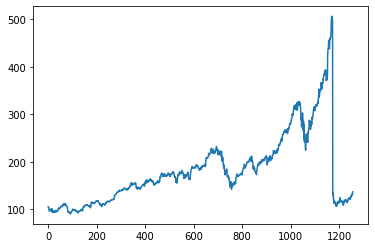

In [28]:
plt.plot(df1)

### LSTM are sensitive to the scale of the data, so we apply MinMax scaler

In [34]:
from sklearn.preprocessing import MinMaxScaler

# we are settting the feature range to 0,1. This is because we need to scale it down to a value between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))

# converting the df1 into an array
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [35]:
# now for df1 you get an array of values between 0 to 1
df1

array([[0.03588695],
       [0.03610343],
       [0.02975346],
       ...,
       [0.09770295],
       [0.10013229],
       [0.11148527]])

### Performing Train-Test split 

In [37]:
# For time series data this process is a bit different, this is because the next data is depended on the previous data.
# Eg: The stock price for today will be dependent on t yesterdays stock price value
# Therefore train-test split happens a bit differently

training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1),:1]

### Creating a function which splits the data properly into dependent and independent dataset

In [40]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

### Reshape into X=t, t+1, t+2, t+3 and Y=t+4

In [41]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [42]:
# Displaying the X_train data
X_train

array([[0.03588695, 0.03610343, 0.02975346, ..., 0.01173782, 0.01464823,
        0.018184  ],
       [0.03610343, 0.02975346, 0.02491882, ..., 0.01464823, 0.018184  ,
        0.02232111],
       [0.02975346, 0.02491882, 0.01469633, ..., 0.018184  , 0.02232111,
        0.02422129],
       ...,
       [0.29575466, 0.30912808, 0.31720986, ..., 0.24223692, 0.2366807 ,
        0.23199038],
       [0.30912808, 0.31720986, 0.28175586, ..., 0.2366807 , 0.23199038,
        0.23603127],
       [0.31720986, 0.28175586, 0.2675887 , ..., 0.23199038, 0.23603127,
        0.23663259]])

In [43]:
# Displaying the shape 
X_train.shape, X_test.shape

((716, 100), (339, 100))

In [45]:
# Displaying the shape 
y_train.shape, y_test.shape

((716,), (339,))

### Reshape input to be [sample, time steps, features] which is required for LSTM

In [46]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Creating the LSTM model

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Fitting the model


In [51]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0092 - val_loss: 0.0568
Epoch 2/100
12/12 [==============================] - 1s 112ms/step - loss: 0.0022 - val_loss: 0.0225
Epoch 3/100
12/12 [==============================] - 1s 115ms/step - loss: 6.5690e-04 - val_loss: 0.0226
Epoch 4/100
12/12 [==============================] - 1s 118ms/step - loss: 4.6254e-04 - val_loss: 0.0211
Epoch 5/100
12/12 [==============================] - 1s 113ms/step - loss: 3.5831e-04 - val_loss: 0.0187
Epoch 6/100
12/12 [==============================] - 2s 131ms/step - loss: 3.3675e-04 - val_loss: 0.0182
Epoch 7/100
12/12 [==============================] - 2s 176ms/step - loss: 3.1027e-04 - val_loss: 0.0179
Epoch 8/100
12/12 [==============================] - 2s 182ms/step - loss: 3.1627e-04 - val_loss: 0.0172
Epoch 9/100
12/12 [==============================] - 2s 175ms/step - loss: 2.8370e-04 - val_loss: 0.0168
Epoch 10/100
12/12 [==============================] - 2s 175ms/

12/12 [==============================] - 2s 168ms/step - loss: 1.0693e-04 - val_loss: 0.0094
Epoch 79/100
12/12 [==============================] - 2s 167ms/step - loss: 1.2149e-04 - val_loss: 0.0078
Epoch 80/100
12/12 [==============================] - 2s 170ms/step - loss: 1.0824e-04 - val_loss: 0.0078
Epoch 81/100
12/12 [==============================] - 2s 166ms/step - loss: 1.0681e-04 - val_loss: 0.0076
Epoch 82/100
12/12 [==============================] - 2s 167ms/step - loss: 1.0606e-04 - val_loss: 0.0075
Epoch 83/100
12/12 [==============================] - 2s 166ms/step - loss: 1.0100e-04 - val_loss: 0.0075
Epoch 84/100
12/12 [==============================] - 2s 166ms/step - loss: 1.0416e-04 - val_loss: 0.0073
Epoch 85/100
12/12 [==============================] - 2s 169ms/step - loss: 1.0206e-04 - val_loss: 0.0092
Epoch 86/100
12/12 [==============================] - 2s 167ms/step - loss: 9.9886e-05 - val_loss: 0.0072
Epoch 87/100
12/12 [==============================] - 2s 16

### Lets Do the prediction and check performance metrics

In [52]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

### Transform back to original form

In [53]:
# Perform the reverse scale because we have scaled for training purposes already
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrisc

In [54]:
# RMSE --> Root Mean Square Error
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

159.205674611561

### Test Data RMSE

In [55]:
math.sqrt(mean_squared_error(y_test,test_predict))

264.2863536537824

### Plotting

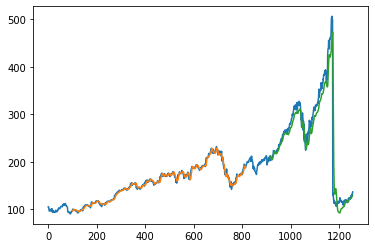

In [57]:
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back: len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back*2)+1: len(df1)-1,:] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# green color is the predicted test data
# orange color is the predicted train data


In [65]:
# Input data sample (for the previous 100 days to predict for future, because to predict a future value we 
# need the previous 100 days output)
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [66]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

### Prediction for the next 10 days

In [67]:
lst_output = []
n_steps = 100
i = 0

while(i<30):
    
    if(len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
         
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

        
print(lst_output)

[0.09636471]
101
1 day input [0.85173782 0.86727601 0.83502105 0.86999399 0.88923632 0.88825015
 0.8853638  0.89455201 0.89594708 0.92064943 0.97929044 0.99360192
 0.98366807 1.         0.98544799 0.9834997  0.09308479 0.10544799
 0.09876127 0.07345761 0.07365003 0.05407096 0.06489477 0.0556825
 0.05209862 0.06016837 0.06061335 0.0524113  0.04810583 0.03968731
 0.04748046 0.05164161 0.04036079 0.04300661 0.0527721  0.05921828
 0.05712568 0.06126278 0.06361996 0.05455201 0.06292243 0.05488876
 0.05950692 0.05924233 0.06405292 0.08192423 0.07398677 0.07420325
 0.07304871 0.06898376 0.06167168 0.06535177 0.06381239 0.06111846
 0.0594107  0.05943476 0.06316296 0.05017438 0.06008419 0.044546
 0.04432952 0.04834636 0.05919423 0.06900782 0.06819002 0.06248948
 0.06164762 0.07011425 0.06944077 0.06956103 0.07206254 0.06987372
 0.06660253 0.06806975 0.06494287 0.05654841 0.05972339 0.06179194
 0.06313891 0.06905592 0.07788334 0.07874925 0.07841251 0.07675286
 0.08036079 0.08187613 0.07562237 0.

10 day output [[0.09643945]]
11 day input [0.97929044 0.99360192 0.98366807 1.         0.98544799 0.9834997
 0.09308479 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096
 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113
 0.04810583 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661
 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996 0.05455201
 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423
 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177
 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438
 0.06008419 0.044546   0.04432952 0.04834636 0.05919423 0.06900782
 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077 0.06956103
 0.07206254 0.06987372 0.06660253 0.06806975 0.06494287 0.05654841
 0.05972339 0.06179194 0.06313891 0.06905592 0.07788334 0.07874925
 0.07841251 0.07675286 0.08036079 0.08187613 0.07562237 0.0791341
 0.0771377  0.07562237 0.09029465 0.09012628 0.09226699 0.08734817
 0.0911365  0.09991581 

19 day output [[0.0982909]]
20 day input [0.07345761 0.07365003 0.05407096 0.06489477 0.0556825  0.05209862
 0.06016837 0.06061335 0.0524113  0.04810583 0.03968731 0.04748046
 0.05164161 0.04036079 0.04300661 0.0527721  0.05921828 0.05712568
 0.06126278 0.06361996 0.05455201 0.06292243 0.05488876 0.05950692
 0.05924233 0.06405292 0.08192423 0.07398677 0.07420325 0.07304871
 0.06898376 0.06167168 0.06535177 0.06381239 0.06111846 0.0594107
 0.05943476 0.06316296 0.05017438 0.06008419 0.044546   0.04432952
 0.04834636 0.05919423 0.06900782 0.06819002 0.06248948 0.06164762
 0.07011425 0.06944077 0.06956103 0.07206254 0.06987372 0.06660253
 0.06806975 0.06494287 0.05654841 0.05972339 0.06179194 0.06313891
 0.06905592 0.07788334 0.07874925 0.07841251 0.07675286 0.08036079
 0.08187613 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465
 0.09012628 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295
 0.10013229 0.11148527 0.09636471 0.09839754 0.09928371 0.09934863
 0.09896383 0.09840214

27 day output [[0.10080335]]
28 day input [0.0524113  0.04810583 0.03968731 0.04748046 0.05164161 0.04036079
 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996
 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292
 0.08192423 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168
 0.06535177 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296
 0.05017438 0.06008419 0.044546   0.04432952 0.04834636 0.05919423
 0.06900782 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077
 0.06956103 0.07206254 0.06987372 0.06660253 0.06806975 0.06494287
 0.05654841 0.05972339 0.06179194 0.06313891 0.06905592 0.07788334
 0.07874925 0.07841251 0.07675286 0.08036079 0.08187613 0.07562237
 0.0791341  0.0771377  0.07562237 0.09029465 0.09012628 0.09226699
 0.08734817 0.0911365  0.09991581 0.09770295 0.10013229 0.11148527
 0.09636471 0.09839754 0.09928371 0.09934863 0.09896383 0.09840214
 0.09782534 0.09731577 0.09690916 0.0966171  0.09643945 0.09637029
 0.09640009 0.096517

In [70]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [79]:
day_new.shape, day_pred.shape

((100,), (30,))

In [81]:
df3 = df1.tolist()
df3.extend(lst_output)


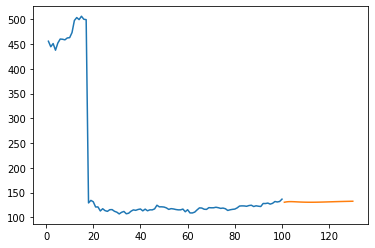

In [85]:
plt.plot(day_new, scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

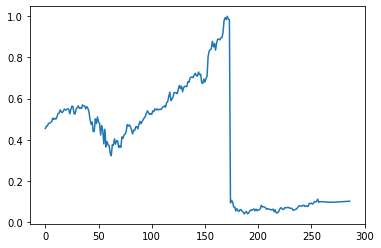

In [90]:
# Combined
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])